# <center>Stock Price Prediction</center>

## Modules

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

## Initializing the dataframe

In [2]:
start = datetime.date(2005, 1, 1)
end = datetime.date.today()

In [27]:
df = yf.download(['MSFT'], start, end).reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,26.799999,26.950001,26.650000,26.740000,18.772661,65002900
1,2005-01-04,26.870001,27.100000,26.660000,26.840000,18.842865,109442100
2,2005-01-05,26.840000,27.100000,26.760000,26.780001,18.800749,72463500
3,2005-01-06,26.850000,27.059999,26.639999,26.750000,18.779676,76890500
4,2005-01-07,26.820000,26.889999,26.620001,26.670000,18.723518,68723300


In [28]:
df.shape

(4645, 7)

In [29]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4645,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4.645000e+03
mean,2014-03-24 22:38:09.429494016,84.519795,85.375479,83.651974,84.553914,78.897893,4.610496e+07
min,2005-01-03 00:00:00,15.200000,15.620000,14.870000,15.150000,11.351548,7.425600e+06
25%,2009-08-13 00:00:00,27.480000,27.750000,27.230000,27.520000,20.748117,2.654110e+07
50%,2014-03-26 00:00:00,39.340000,39.820000,39.000000,39.419998,33.581593,3.917560e+07
75%,2018-11-01 00:00:00,107.790001,108.699997,106.199997,107.589996,102.183990,5.798170e+07
max,2023-06-15 00:00:00,344.619995,349.839996,342.200012,348.100006,348.100006,5.910522e+08
std,NaN,86.764315,87.696618,85.805048,86.808390,87.848953,2.856466e+07


In [30]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [31]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [33]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2005-01-03,26.740000
1,2005-01-04,26.840000
2,2005-01-05,26.780001
3,2005-01-06,26.750000
4,2005-01-07,26.670000


## Exploratory Data Analysis

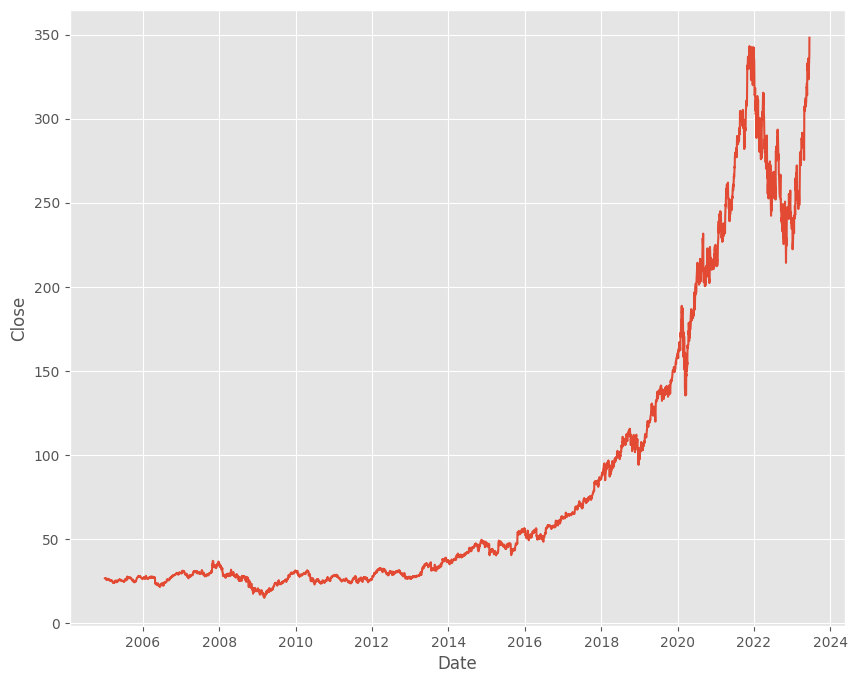

In [42]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=df.Close, x=df.Date)
plt.show()

## Model Training

In [52]:
X = df['Date']
y = df['Close']

In [55]:
X = X.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [54]:
scaler = MinMaxScaler()

scaler.fit(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1.4967936e+18 1.1556864e+18 1.1248416e+18 ... 1.3557888e+18 1.5645312e+18
 1.1809152e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.